<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Proyecto 1: Análisis estadístico</font></b></h1>
        <h2><font color='0B5345'>Proyecto 2024-02</font></h2>
        <h3><font color='0B5345'>Natalia Arenas Pachón - Daniel Tamayo</font></h3>
        <h3><font color='0B5345'>2024</font></h3>
    </div>
</div>

<h3><strong>Contexto del problema</strong></h3>
<p style="text-align: justify;">
Las enfermedades neurodegenerativas a menudo afectan la marcha y la movilidad. Para comprender mejor la fisiopatología de estas enfermedades y mejorar nuestra capacidad de medir las respuestas a las intervenciones terapéuticas, puede resultar útil cuantificar con precisión la dinámica de la marcha (https://physionet.org/content/gaitndd/1.0.0/).
</p>

<h3><strong>Consulta </strong></h3>

**1.** Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades **(5%).**

<div style="text-align: center;">
    <h5><strong>Enfermedad de Parkinson</strong></h5>
</div>
<p style="text-align: justify;">
La enfermedad de Parkinson es un trastorno del cerebro que provoca movimientos involuntarios o incontrolables, como temblores, rigidez y dificultad con el equilibrio y la coordinación.

Por lo general, los síntomas comienzan poco a poco y empeoran con el tiempo. A medida que la enfermedad avanza, las personas pueden tener dificultad para caminar y hablar. También pueden tener cambios mentales y de comportamiento, problemas para dormir, depresión, dificultades de memoria y fatiga.

**Diagnostico:**
Los signos y los síntomas más comunes de la enfermedad de Parkinson ocurren cuando las células nerviosas en los ganglios basales (un área del cerebro que controla el movimiento) se deterioran o mueren. Normalmente, estas células nerviosas, o neuronas, producen una sustancia química cerebral importante llamada dopamina. Cuando las neuronas mueren o se deterioran, producen menos dopamina, lo que provoca los problemas de movimiento asociados con esta enfermedad. Las personas con la enfermedad de Parkinson también pierden las terminaciones nerviosas que producen norepinefrina, el principal mensajero químico del sistema nervioso simpático, que controla muchas funciones del cuerpo, como la frecuencia cardíaca y la presión arterial.

**Reto:**
Actualmente, no existen análisis de sangre u otras pruebas de laboratorio para diagnosticar casos no genéticos de la enfermedad de Parkinson. 

https://www.nia.nih.gov/espanol/parkinson/enfermedad-parkinson-causas-sintomas-tratamientos#:~:text=Diagn%C3%B3stico%20de%20la%20enfermedad%20de%20Parkinson,-Actualmente%2C%20no%20existen&text=Por%20lo%20general%2C%20los%20m%C3%A9dicos,que%20la%20persona%20tiene%20Parkinson.
</p>

<div style="text-align: center;">
    <h5><strong>Enfermedad de Huntington</strong></h5>
</div>
<p style="text-align: justify;">
La enfermedad de Huntington es una enfermedad hereditaria degenerativa y progresiva que resulta en el desgaste de las células nerviosas (neuronas) en algunas áreas del cerebro. Estas alteraciones en el cerebro provocan movimientos incontrolados, pérdida de la capacidad intelectual y trastornos emocionales en los afectados. 

**Diagnostico:**
El diagnóstico se sospecha si hay señales y síntomas de la enfermedad, como las alteraciones progresivas de los movimientos, alteraciones mentales y de comportamiento, y si existen otros casos en la familia. Exámenes de imagen como la tomografía computarizada y la resonancia magnética del cerebro pueden auxiliar el diagnóstico.

El diagnóstico es confirmado mediante una prueba genética para identificar el número de la repetición en la secuencia CAG en el gen HTT. Un número de 26 repeticiones o menos del triplete CAG en el gen HTT es considerado normal. Los individuos que tienen entre 27 a 35 repeticiones no tienen la enfermedad pero pueden tener hijos o hijas afectadas. Si se encuentran 36 o más repeticiones de la secuencia en un individuo hay mucha chance de ser afectado. Cuando hay más de 40 repeticiones la persona casi siempre es afectada.

**Reto:**
Todavía no existe cura para esta enfermedad y el tratamiento está dirigido para aliviar los síntomas de los afectados. 

https://rarediseases.info.nih.gov/espanol/11993/enfermedad-de-huntington
</p>

<div style="text-align: center;">
    <h5><strong>Enfermedad de Esclerosis Lateral Amiotrófica</strong></h5>
</div>
<p style="text-align: justify;">
La esclerosis lateral amiotrófica (ELA), también conocida como enfermedad de Lou Gehrig o ALS por sus siglas en inglés, es una enfermedad neurológica poco frecuente que afecta las neuronas motoras, es decir, las células nerviosas en el cerebro y la médula espinal que controlan el movimiento muscular voluntario. Los músculos voluntarios son aquellos que decidimos usar para producir movimientos como masticar, caminar y hablar.

La esclerosis lateral amiotrófica es un tipo de enfermedad de las neuronas motoras. A medida que las neuronas motoras se degeneran y mueren, dejan de enviar mensajes a los músculos, lo que hace que estos se debiliten, comiencen a contraerse (lo que se denomina fasciculaciones) y se desgasten (lo que se denomina atrofia). Con el tiempo, el cerebro pierde su capacidad para iniciar y controlar los movimientos voluntarios.

**Diagnostico:**
Un examen neurológico evaluará los reflejos, fuerza muscular y otras respuestas, y se llevará a cabo a intervalos regulares para evaluar si los síntomas como debilidad muscular, atrofia muscular y espasticidad están empeorando de manera progresiva.

Las pruebas musculares y de imágenes para descartar otras enfermedades y confirmar el diagnóstico incluyen: electromiografía (EMG), estudio de conducción nerviosa,  resonancia magnética (también conocida como MRI, por sus siglas en inglés).  

**Reto:**
La enfermedad es progresiva, lo que significa que los síntomas empeoran con el tiempo. No tiene cura y no existe un tratamiento eficaz para revertir su progresión.

https://espanol.ninds.nih.gov/es/trastornos/esclerosis-lateral-amiotrofica-ela
</p>
<hr>

**2.** Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy **(5%)
<hr>

**3.** Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel **(5%)**
<hr>

**4.** Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) **(5%)**
<hr>

<h3><strong> Organización de datos </strong></h3>

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import os
import glob
import scipy.io as sio;

In [518]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

c:\Users\natal\OneDrive\Escritorio\LaboratorioBiosenales\Proyecto_1


In [519]:
archivos=os.listdir(directorio_actual + "/gait-in-neurodegenerative-disease-database-1.0.0")
print(len(archivos))

4


<hr>
<h3><strong>Programación </strong></h3>

**1.** Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [520]:
#AQUI SE EXTRAEN SOLO LOS ARCHIVOS .TS DE LA CARPETA

#archivos
#als#.ts son 13 en total
#control#.ts son 16 en total
#hunt#.ts son 20 en total
#park#.ts son 15 en total
#64 en total check

# Define el directorio base
directorio_actual = os.getcwd()  # o la ruta deseada

# Archivos ALS
archivo_als = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "als", "*.ts")
lista_als = glob.glob(archivo_als)
print("Archivos ALS:", lista_als)

# Archivos Hunt
archivo_hunt = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "hunt", "*.ts")
lista_hunt = glob.glob(archivo_hunt)
print("Archivos Hunt:", lista_hunt)

# Archivos Park
archivo_park = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "park", "*.ts")
lista_park = glob.glob(archivo_park)
print("Archivos Park:", lista_park)

# Archivos Control
archivo_control = os.path.join(directorio_actual, "gait-in-neurodegenerative-disease-database-1.0.0", "control", "*.ts")
lista_control = glob.glob(archivo_control)
print("Archivos Control:", lista_control)

# Para verificar cuántos archivos has cargado en total:
total_archivos = len(lista_als) + len(lista_hunt) + len(lista_park) + len(lista_control)
print("Total de archivos .ts:", total_archivos)


Archivos ALS: ['c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als1.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als10.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als11.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als12.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als13.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als2.ts', 'c:\\Users\\natal\\OneDrive\\Escritorio\\LaboratorioBiosenales\\Proyecto_1\\gait-in-neurodegenerative-disease-database-1.0.0\\als\\als3

In [521]:
#AQUÍ FUNCION QUE CARGA DATOS
def cargar(file):
    
    # Leer el archivo con pandas
    data = pd.read_csv(file, sep='\t', header=None, usecols=[0, 1, 2, 3, 4])
    
    # Aplicar ndarray
    tiempo = (data[0])
    int_pasosi = (signal.detrend(data[1].values))
    int_pasosd = (signal.detrend(data[2].values))
    int_balani = (signal.detrend(data[3].values))
    int_baland = (signal.detrend(data[4].values))
    
    #Crear DataFrame con las señales
    names = ['Tiempo transcurrido (sec)', 'Intervalos entre pasos pie izquierdo (sec)', 
         'Intervalos entre pasos pie derecho (sec)' , 'Intervalos de balanceo pie izquierdo (sec)', 'Intervalos de balanceo pie derecho (sec)']  
    
    df = pd.DataFrame({
        'Tiempo transcurrido (sec)': tiempo,
        'Intervalos entre pasos pie izquierdo (sec)': int_pasosi,
        'Intervalos entre pasos pie derecho (sec)': int_pasosd,
        'Intervalos de balanceo pie izquierdo (sec)': int_balani,
        'Intervalos de balanceo pie derecho (sec)': int_baland
    })
    return df

In [522]:
# Cargar cada archivo de lista_
def load(lista_archivos):
    senales_grupo = []
    for archivo in lista_archivos:
        senales = cargar(archivo)
        senales_grupo.append(senales)

    return senales_grupo

# Llamar la función para cargar todos los archivos
signals_als = load(lista_als)
signals_hunt = load(lista_hunt)
signals_park = load(lista_park)
signals_control = load(lista_control)


<h5><font color='0B5345'> 
Ya a los datos se le eliminaron los primeros 20 seg (NO SE HACE)

<hr>
<h8><strong>2.</strong></h8> <h8>Para cada señal eliminar los errores en tendencia usando la rutina detrend.</h8>


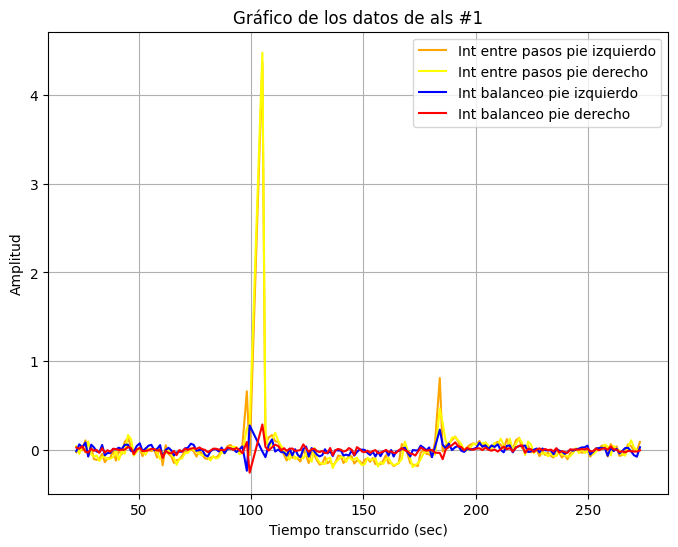

In [523]:
als_1 = signals_als[0] #als 1

tiempo = als_1['Tiempo transcurrido (sec)']
int_pasosi = als_1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosd = als_1['Intervalos entre pasos pie derecho (sec)']
int_balani = als_1['Intervalos de balanceo pie izquierdo (sec)']
int_baland = als_1['Intervalos de balanceo pie derecho (sec)']

#Grafico los datos de als
plt.figure(figsize=(8, 6))
plt.plot(tiempo,int_pasosi,label='Int entre pasos pie izquierdo', color='orange')
plt.plot(tiempo,int_pasosd,label='Int entre pasos pie derecho', color='yellow')
plt.plot(tiempo,int_balani,label='Int balanceo pie izquierdo', color='blue')
plt.plot(tiempo,int_baland,label='Int balanceo pie derecho', color='red')

plt.title('Gráfico de los datos de als #1')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

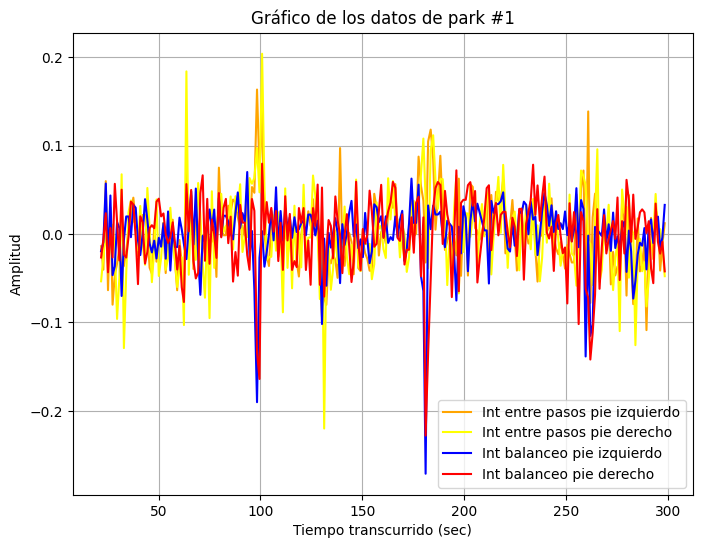

In [524]:
park_1 = signals_park[0] #park 1

tiempo = park_1['Tiempo transcurrido (sec)']
int_pasosi = park_1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosd = park_1['Intervalos entre pasos pie derecho (sec)']
int_balani = park_1['Intervalos de balanceo pie izquierdo (sec)']
int_baland = park_1['Intervalos de balanceo pie derecho (sec)']

#Grafico los datos de park
plt.figure(figsize=(8, 6))
plt.plot(tiempo,int_pasosi,label='Int entre pasos pie izquierdo', color='orange')
plt.plot(tiempo,int_pasosd,label='Int entre pasos pie derecho', color='yellow')
plt.plot(tiempo,int_balani,label='Int balanceo pie izquierdo', color='blue')
plt.plot(tiempo,int_baland,label='Int balanceo pie derecho', color='red')

plt.title('Gráfico de los datos de park #1')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

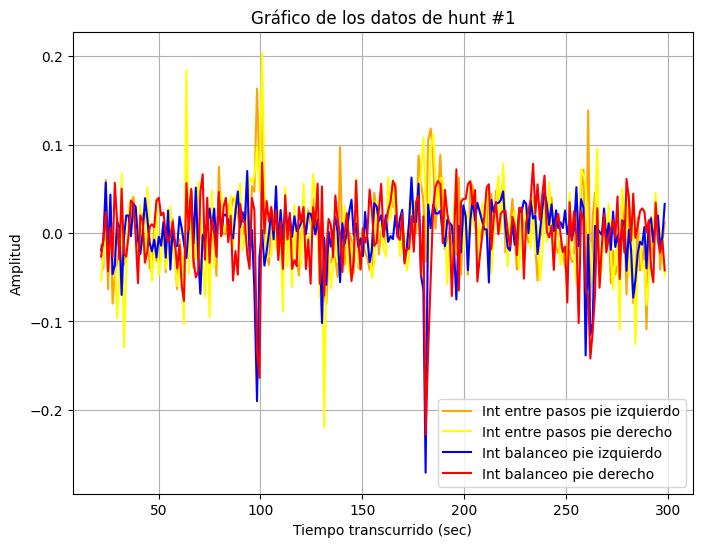

In [525]:
hunt_1 = signals_park[0] #hunt 1

tiempo = hunt_1['Tiempo transcurrido (sec)']
int_pasosi = hunt_1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosd = hunt_1['Intervalos entre pasos pie derecho (sec)']
int_balani = hunt_1['Intervalos de balanceo pie izquierdo (sec)']
int_baland = hunt_1['Intervalos de balanceo pie derecho (sec)']

#Grafico los datos de hunt
plt.figure(figsize=(8, 6))
plt.plot(tiempo,int_pasosi,label='Int entre pasos pie izquierdo', color='orange')
plt.plot(tiempo,int_pasosd,label='Int entre pasos pie derecho', color='yellow')
plt.plot(tiempo,int_balani,label='Int balanceo pie izquierdo', color='blue')
plt.plot(tiempo,int_baland,label='Int balanceo pie derecho', color='red')

plt.title('Gráfico de los datos de hunt #1')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

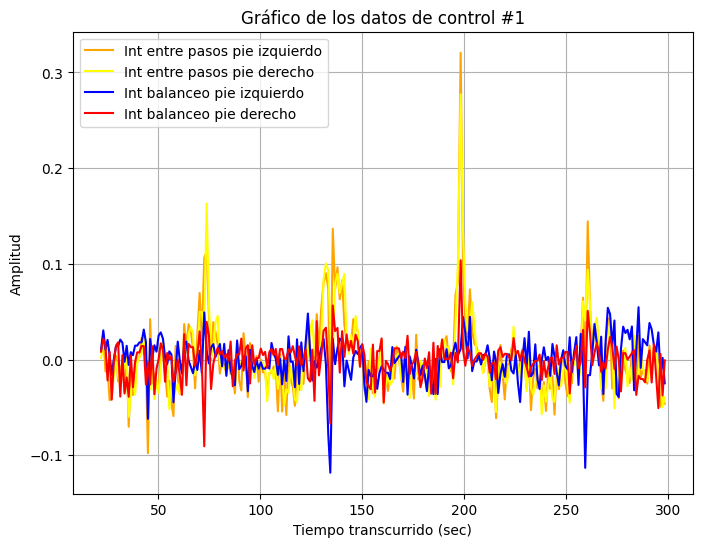

In [526]:
control_1 = signals_control[0] #control 1

tiempo = control_1['Tiempo transcurrido (sec)']
int_pasosi = control_1['Intervalos entre pasos pie izquierdo (sec)']
int_pasosd = control_1['Intervalos entre pasos pie derecho (sec)']
int_balani = control_1['Intervalos de balanceo pie izquierdo (sec)']
int_baland = control_1['Intervalos de balanceo pie derecho (sec)']

#Grafico los datos de control
plt.figure(figsize=(8, 6))
plt.plot(tiempo,int_pasosi,label='Int entre pasos pie izquierdo', color='orange')
plt.plot(tiempo,int_pasosd,label='Int entre pasos pie derecho', color='yellow')
plt.plot(tiempo,int_balani,label='Int balanceo pie izquierdo', color='blue')
plt.plot(tiempo,int_baland,label='Int balanceo pie derecho', color='red')

plt.title('Gráfico de los datos de control #1')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

<hr>
<h8><strong>3.</strong></h8> <h8>Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel.</h8>

In [527]:
def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    print("changing");
    numero = np.sum((TestVal > Thresh * MAD)==True)
    print(numero)

    yk[TestVal > Thresh * MAD] = ref

    return yk

changing
1


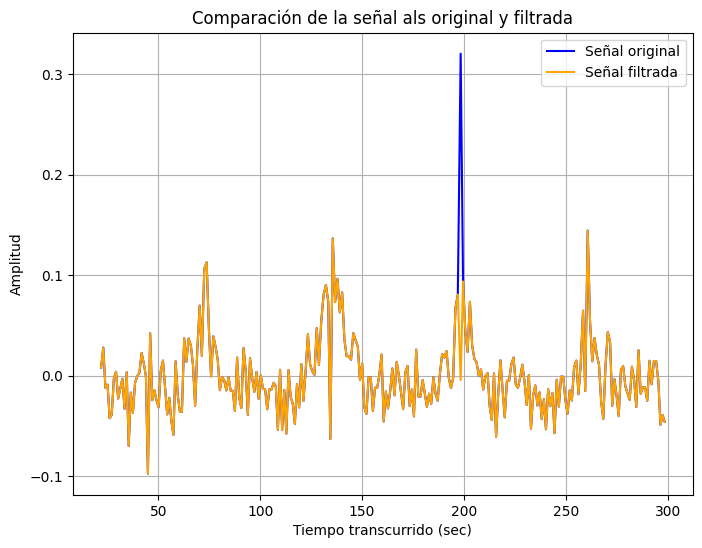

In [528]:
#Filtro para datos als
control_1_filtrada = signals_control[0] #control 1

tiempo = control_1_filtrada['Tiempo transcurrido (sec)']
int_pasosi = control_1_filtrada['Intervalos entre pasos pie izquierdo (sec)']
# int_pasosd = als_1_filtrada['Intervalos entre pasos pie derecho (sec)']
# int_balani = als_1_filtrada['Intervalos de balanceo pie izquierdo (sec)']
# int_baland = als_1_filtrada['Intervalos de balanceo pie derecho (sec)']

plt.figure(figsize=(8,6))

# Graficar la señal original
plt.plot(tiempo, int_pasosi, label='Señal original', color='blue')

int_pasosi_filtrada = hampelfilter(int_pasosi,3,[6])

# Graficar la señal filtrada
plt.plot(tiempo, int_pasosi_filtrada, label='Señal filtrada', color='orange')

plt.title('Comparación de la señal als original y filtrada')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()


changing
3


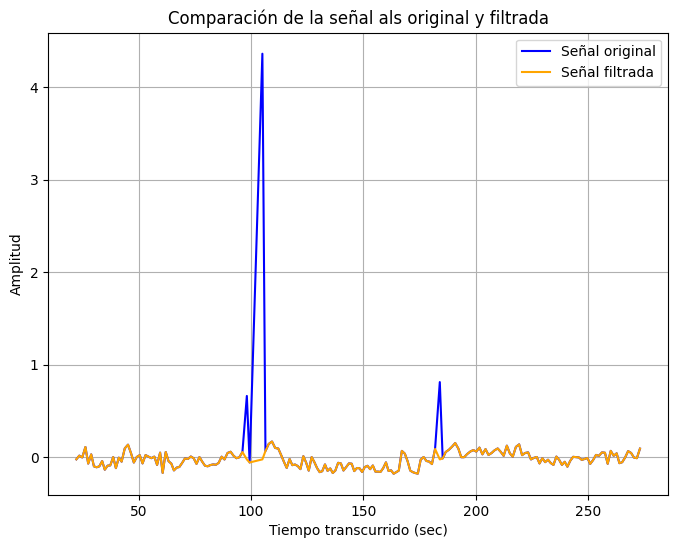

In [529]:
#Filtro para datos als
als_1_filtrada = signals_als[0] #control 1

tiempo = als_1_filtrada['Tiempo transcurrido (sec)']
int_pasosi = als_1_filtrada['Intervalos entre pasos pie izquierdo (sec)']
# int_pasosd = als_1_filtrada['Intervalos entre pasos pie derecho (sec)']
# int_balani = als_1_filtrada['Intervalos de balanceo pie izquierdo (sec)']
# int_baland = als_1_filtrada['Intervalos de balanceo pie derecho (sec)']

plt.figure(figsize=(8,6))

# Graficar la señal original
plt.plot(tiempo, int_pasosi, label='Señal original', color='blue')

int_pasosi_filtrada = hampelfilter(int_pasosi,3,[6])

# Graficar la señal filtrada
plt.plot(tiempo, int_pasosi_filtrada, label='Señal filtrada', color='orange')

plt.title('Comparación de la señal als original y filtrada')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()


changing
0


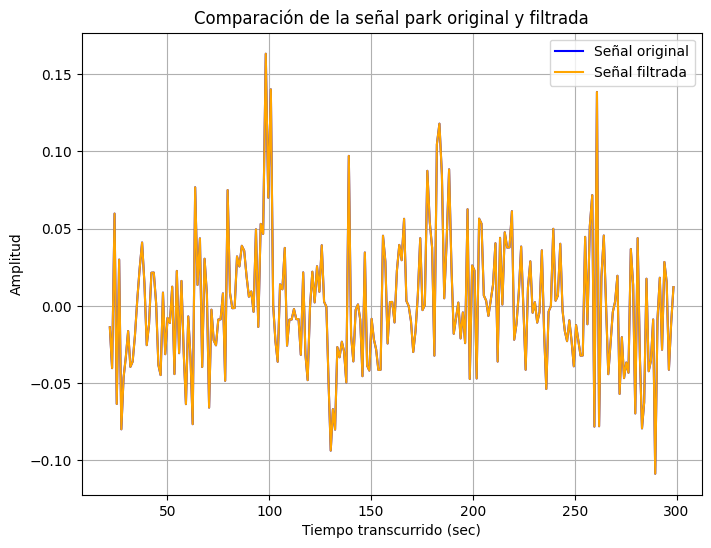

In [530]:
#Filtro para datos als
park_1_filtrada = signals_park[0] #control 1

tiempo = park_1_filtrada['Tiempo transcurrido (sec)']
int_pasosi = park_1_filtrada['Intervalos entre pasos pie izquierdo (sec)']
# int_pasosd = als_1_filtrada['Intervalos entre pasos pie derecho (sec)']
# int_balani = als_1_filtrada['Intervalos de balanceo pie izquierdo (sec)']
# int_baland = als_1_filtrada['Intervalos de balanceo pie derecho (sec)']

plt.figure(figsize=(8,6))

# Graficar la señal original
plt.plot(tiempo, int_pasosi, label='Señal original', color='blue')

int_pasosi_filtrada = hampelfilter(int_pasosi,3,[6])

# Graficar la señal filtrada
plt.plot(tiempo, int_pasosi_filtrada, label='Señal filtrada', color='orange')

plt.title('Comparación de la señal park original y filtrada')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()


changing
1


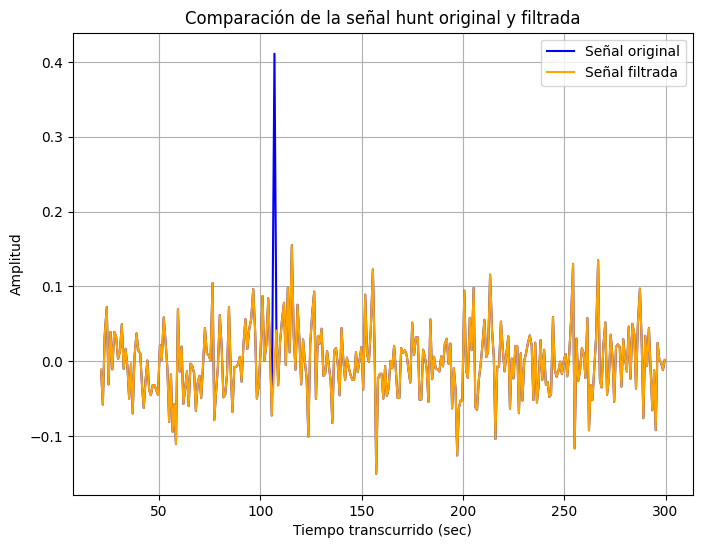

In [531]:
#Filtro para datos als
hunt_1_filtrada = signals_hunt[0] #control 1

tiempo = hunt_1_filtrada['Tiempo transcurrido (sec)']
int_pasosi = hunt_1_filtrada['Intervalos entre pasos pie izquierdo (sec)']
# int_pasosd = als_1_filtrada['Intervalos entre pasos pie derecho (sec)']
# int_balani = als_1_filtrada['Intervalos de balanceo pie izquierdo (sec)']
# int_baland = als_1_filtrada['Intervalos de balanceo pie derecho (sec)']

plt.figure(figsize=(8,6))

# Graficar la señal original
plt.plot(tiempo, int_pasosi, label='Señal original', color='blue')

int_pasosi_filtrada = hampelfilter(int_pasosi,3,[6])

# Graficar la señal filtrada
plt.plot(tiempo, int_pasosi_filtrada, label='Señal filtrada', color='orange')

plt.title('Comparación de la señal hunt original y filtrada')
plt.xlabel('Tiempo transcurrido (sec)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()


<hr>
<h8><strong>4.</strong></h8> <h8>Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia.</h8>

In [532]:
# def calcular_cv_sd(signal):
    
#     # Calcular la media
#     media = np.mean(signal)
    
#     # Calcular la desviación estándar
#     sd = np.std(signal)
    
#     # Calcular el coeficiente de variación
#     if media != 0:  # Para evitar división por cero
#         cv = (sd / media) * 100
#     else:
#         cv = np.nan  # O manejarlo de otra forma si la media es cero

#     return cv, sd

# cv, sd = calcular_cv_sd(signal)
# print(f"Coeficiente de variación (CV): {cv:.2f}%")
# print(f"Desviación estándar (SD): {sd:.2f}")


<hr>
<h8><strong>5.</strong></h8> <h8>Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación.</h8>

In [533]:
#

<hr>
<h8><strong>6.</strong></h8> <h8>Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal.</h8>

In [534]:
#

<hr>
<h3><strong>Discusión</strong></h3>
<h8><strong>a.</strong></h8> <h8>Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva.</h8>

<hr>
<h8><strong>b.</strong></h8> <h8>Planteamiento de las hipótesis nulas y alternativas, selección del tipo de prueba (paramétrica o no paramétrica) y discusión de los resultados.</h8>

<hr>
<h8><strong>c.</strong></h8> <h8>Discutir los resultados obtenidos con los presentado en el artículo base.</h8>


<hr>
<h8><strong>d.</strong></h8> <h8>Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles.</h8>